In [1]:
from statsbombpy import sb
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


**xG Model** 


The xG metric describes the number of goals we'd expect a team to score based on the chances it creates. Each shot can be assigned an xG value, ranging from 0 to 1, which represents the probability of the shot resulting in a goal.


The following notebook goes through creating an xG model created using Statsbomb public data. The model is creating using data from Barcelona's La Liga matches from 2004 to 2020.

## Notebook Overview

1. Fetching data 
    - 1.1 Getting data from Statsbomb
    - 1.2 Extracting shots data and attributes
    
2. Data preprocessing for ML models
    
3. Model Performance

4. Model comparison

5. Future Work

## 1. Fetching data

### 1.1 Getting data from Statsbomb. 

In [2]:
sb_comp = sb.competitions()

credentials were not supplied. open data access only


In [3]:
sb_comp.tail(10)

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
30,11,21,Spain,La Liga,male,False,False,2009/2010,2021-10-26T13:56:40.989214,2021-06-13T16:17:31.694,None,2021-10-26T13:56:40.989214
31,11,41,Spain,La Liga,male,False,False,2008/2009,2020-07-29T05:00,2021-06-13T16:17:31.694,None,2020-07-29T05:00
32,11,40,Spain,La Liga,male,False,False,2007/2008,2021-10-26T13:13:56.180589,2021-06-13T16:17:31.694,None,2021-10-26T13:13:56.180589
33,11,39,Spain,La Liga,male,False,False,2006/2007,2020-07-29T05:00,2021-06-13T16:17:31.694,None,2020-07-29T05:00
34,11,38,Spain,La Liga,male,False,False,2005/2006,2021-11-28T23:00:27.747396,2021-06-13T16:17:31.694,None,2021-11-28T23:00:27.747396
35,11,37,Spain,La Liga,male,False,False,2004/2005,2020-07-29T05:00,2021-06-13T16:17:31.694,None,2020-07-29T05:00
36,49,3,United States of America,NWSL,female,False,False,2018,2021-11-06T05:53:29.435016,2021-06-13T16:17:31.694,None,2021-11-06T05:53:29.435016
37,2,44,England,Premier League,male,False,False,2003/2004,2021-11-14T22:29:00.646120,2021-06-13T16:17:31.694,None,2021-11-14T22:29:00.646120
38,55,43,Europe,UEFA Euro,male,False,True,2020,2022-02-01T17:20:34.319496,2021-11-11T13:54:37.507376,2021-11-11T13:54:37.507376,2022-02-01T17:20:34.319496
39,72,30,International,Women's World Cup,female,False,True,2019,2020-07-29T05:00,2021-06-13T16:17:31.694,None,2020-07-29T05:00


In [4]:
sb_comp = sb_comp[sb_comp["country_name"] == "Spain"].sort_values(["season_name"]).reset_index(drop=True)

In [5]:
sb_comp.head(10)

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,11,37,Spain,La Liga,male,False,False,2004/2005,2020-07-29T05:00,2021-06-13T16:17:31.694,None,2020-07-29T05:00
1,11,38,Spain,La Liga,male,False,False,2005/2006,2021-11-28T23:00:27.747396,2021-06-13T16:17:31.694,None,2021-11-28T23:00:27.747396
2,11,39,Spain,La Liga,male,False,False,2006/2007,2020-07-29T05:00,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,11,40,Spain,La Liga,male,False,False,2007/2008,2021-10-26T13:13:56.180589,2021-06-13T16:17:31.694,None,2021-10-26T13:13:56.180589
4,11,41,Spain,La Liga,male,False,False,2008/2009,2020-07-29T05:00,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,11,21,Spain,La Liga,male,False,False,2009/2010,2021-10-26T13:56:40.989214,2021-06-13T16:17:31.694,None,2021-10-26T13:56:40.989214
6,11,22,Spain,La Liga,male,False,False,2010/2011,2021-11-11T22:57:42.361902,2021-06-13T16:17:31.694,None,2021-11-11T22:57:42.361902
7,11,23,Spain,La Liga,male,False,False,2011/2012,2020-07-29T05:00,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,11,24,Spain,La Liga,male,False,False,2012/2013,2021-10-27T15:44:43.940862,2021-06-13T16:17:31.694,None,2021-10-27T15:44:43.940862
9,11,25,Spain,La Liga,male,False,False,2013/2014,2020-07-29T05:00,2021-06-13T16:17:31.694,None,2020-07-29T05:00


### 1.2 Extracting shots data and attributes

Using `sb.competition_events` function from Statsbomb, I was able to extract all shots as well as features related to the shots.
These features are: 

- **play pattern**: pattern of play which led to the shot
- **x shot_end_location**: x-location of the shot 
- **y shot_end_location**: y-location of the shot 
- **duration**: duration of the shot
- **outcome**: result of the shot
- **technique**: Name of the technique used for the shot.
- **shot_first_time**: whether the shot was hit for time or not
- **shot_type**: whether the shot was from open play or set piece (and type of set piece specified)
- **shot_one_on_one**: one v one vs the keeper
- **shot_body_part**: Name of the body part used to shoot.

Also some information was extracted to reference shots, but will not be used to train ML model.
These are:
- **game id in which shot was taken**:
- **statsbomb xg**: xg given by statsbomb to compare to my values.

#### Concatenating data from the seasons in one dataframe.

In [ ]:
all_grouped_passes = []
for season_name in sb_comp.season_name:
    grouped_events = sb.competition_events(
        country="Spain",
        division= "La Liga",
        season=season_name,
        split=True
    )['shots']
    grouped_events["season"] = season_name
    grouped_events = grouped_events[["id", "season", "location","shot_technique", "shot_statsbomb_xg", "play_pattern",
                                     "shot_end_location", "shot_type","shot_outcome","shot_first_time",
                                     "shot_one_on_one","duration","shot_body_part"]]
    grouped_events["season"] = season_name
    all_grouped_passes.append(grouped_events)
    
all_grouped_passes = pd.concat(all_grouped_passes, ignore_index=True)

credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access onlycredentials were not supplied. open data access onlycredentials were not supplied. open data access onlycredentials were not supplied. open data access only



credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access onlycredentials were not supplied. open data access onlycredentials were not supplied. open data access onlycredentials were not supplied. open data access only



credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data acces

In [ ]:
all_grouped_passes

In [7]:
# all_data = all_grouped_passes.copy()

In [113]:
all_grouped_passes.shape

(12840, 13)

In [114]:
all_grouped_passes.head(10)

,id,season,location,shot_technique,shot_statsbomb_xg,play_pattern,shot_end_location,shot_type,shot_outcome,shot_first_time,shot_one_on_one,duration,shot_body_part
0,7bae48d6-6021-4833-8560-230234f619e7,2004/2005,"[102.0, 52.8]",Volley,0.048476,Regular Play,"[120.0, 61.4, 1.9]",Open Play,Off T,True,NaN,1.603682,Right Foot
1,3a8cb677-aa4d-437d-b0fe-98acbee2f6aa,2004/2005,"[89.0, 20.7]",Normal,0.011302,Regular Play,"[120.0, 30.1, 0.6]",Open Play,Off T,NaN,NaN,1.512600,Right Foot
2,a7f9720d-34d4-40c9-88ac-1ffb8f54f698,2004/2005,"[81.5, 39.1]",Normal,0.011760,From Free Kick,"[120.0, 37.2, 4.9]",Open Play,Off T,NaN,NaN,1.561600,Right Foot
3,f41c1253-e33e-4edc-a908-9b8670e3162f,2004/2005,"[95.0, 53.5]",Normal,0.025624,From Free Kick,"[120.0, 46.1, 0.3]",Open Play,Off T,NaN,NaN,1.210900,Left Foot
4,25227f21-0145-4661-9fe8-6324d37f9bd0,2004/2005,"[107.7, 33.8]",Normal,0.327577,From Free Kick,"[120.0, 42.8, 1.7]",Open Play,Goal,NaN,True,0.506356,Right Foot
5,75ef314a-f0d5-4b43-8919-c85ee3f8b458,2004/2005,"[89.1, 47.1]",Normal,0.019744,Regular Play,"[120.0, 37.4, 2.3]",Open Play,Goal,NaN,NaN,1.436600,Right Foot
6,9aab611b-4bfa-4b9b-baad-cd28be5c31f2,2004/2005,"[98.1, 38.5]",Volley,0.130081,Regular Play,"[120.0, 46.6, 0.5]",Open Play,Off T,NaN,NaN,1.408582,Right Foot
7,7060d6c6-7824-48f6-9ab5-320d92050af4,2004/2005,"[108.1, 47.6]",Normal,0.354464,Regular Play,"[112.1, 45.8, 0.6]",Open Play,Saved,NaN,NaN,0.154394,Right Foot
8,8a3abee9-e3a6-4ef2-9fbd-e7843c17c60e,2004/2005,"[88.1, 48.0]",Normal,0.035007,From Free Kick,"[100.1, 46.4]",Free Kick,Blocked,NaN,NaN,0.368481,Left Foot
9,ebcef5e8-d5ee-494a-9e38-cecf4c7a1f95,2004/2005,"[113.1, 27.5]",Normal,0.158688,Regular Play,"[120.0, 35.3, 1.6]",Open Play,Off T,NaN,True,0.674309,Right Foot


## 2. Data preprocessing for ML models


In [119]:
print(all_grouped_passes.isna().sum())


id                         0
season                     0
shot_technique             0
shot_statsbomb_xg          0
play_pattern               0
shot_type                  0
shot_outcome               0
shot_first_time         8942
shot_one_on_one        11891
duration                   0
shot_body_part             0
x_start_location           0
y_start_location           0
x_shot_end_location        0
y_shot_end_location        0
z_shot_end_location     3284
dtype: int64


In [116]:
all_grouped_passes[['x_start_location','y_start_location']] = pd.DataFrame(all_grouped_passes['location'].to_list())
all_grouped_passes[['x_shot_end_location','y_shot_end_location', 'z_shot_end_location']] = pd.DataFrame(all_grouped_passes['shot_end_location'].to_list())
all_grouped_passes.drop(["location", "shot_end_location"], axis=1, inplace=True)

In [120]:
print(all_grouped_passes.isna().sum())


id                         0
season                     0
shot_technique             0
shot_statsbomb_xg          0
play_pattern               0
shot_type                  0
shot_outcome               0
shot_first_time         8942
shot_one_on_one        11891
duration                   0
shot_body_part             0
x_start_location           0
y_start_location           0
x_shot_end_location        0
y_shot_end_location        0
z_shot_end_location     3284
dtype: int64


In [121]:
all_grouped_passes.dtypes

id                      object
season                  object
shot_technique          object
shot_statsbomb_xg      float64
play_pattern            object
shot_type               object
shot_outcome            object
shot_first_time         object
shot_one_on_one         object
duration               float64
shot_body_part          object
x_start_location       float64
y_start_location       float64
x_shot_end_location    float64
y_shot_end_location    float64
z_shot_end_location    float64
dtype: object

#### Replacing NaN with False for shots first time and one v one as absence of a value means False.

In [122]:
all_grouped_passes['shot_first_time'] = all_grouped_passes['shot_first_time'].fillna(False)
all_grouped_passes['shot_first_time'] = all_grouped_passes.shot_first_time==True

all_grouped_passes['shot_one_on_one'] = all_grouped_passes['shot_one_on_one'].fillna(False)
all_grouped_passes['shot_one_on_one'] = all_grouped_passes.shot_one_on_one==True


In [124]:
all_grouped_passes[["shot_first_time", "shot_one_on_one"]] = all_grouped_passes[["shot_first_time", "shot_one_on_one"]].astype(int)

In [127]:
# drop z_shot_end_location as it has NAs for now.
all_grouped_passes.drop(["z_shot_end_location"], inplace=True, axis=1)

#### Convert outcome to a binary variable (Goal = 1, Other = 0). My motivation here is use this as a label to train model. Hence, I am only interested in if the shot is goal and not goal.

In [128]:
goal_label_mask = all_grouped_passes["shot_outcome"].str.contains("Goal")
all_grouped_passes["shot_outcome"].loc[goal_label_mask] = 1
all_grouped_passes["shot_outcome"].loc[~goal_label_mask] = 0

/Users/sidd/miniconda3/envs/sid_realtor/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [154]:
all_grouped_passes["shot_outcome"] = pd.to_numeric(all_grouped_passes["shot_outcome"])

#### Looking at different categories of categorical variables

In [130]:
print(all_grouped_passes["shot_type"].value_counts())
print(all_grouped_passes["shot_technique"].value_counts())
print(all_grouped_passes["shot_body_part"].value_counts())
print(all_grouped_passes["play_pattern"].value_counts())
print(all_grouped_passes["shot_outcome"].value_counts())

Open Play    11702
Free Kick      973
Penalty        164
Corner           1
Name: shot_type, dtype: int64
Normal           10471
Half Volley       1206
Volley             760
Lob                233
Overhead Kick       81
Diving Header       52
Backheel            37
Name: shot_technique, dtype: int64
Right Foot    6318
Left Foot     4879
Head          1610
Other           33
Name: shot_body_part, dtype: int64
Regular Play      4544
From Free Kick    3079
From Throw In     1947
From Corner       1746
From Counter       567
From Goal Kick     456
Other              183
From Kick Off      168
From Keeper        150
Name: play_pattern, dtype: int64
0    11084
1     1756
Name: shot_outcome, dtype: int64


### Create a training and test set

In [157]:
### Train test split. 
features=all_grouped_passes.drop(["shot_outcome", "season", "shot_statsbomb_xg"], axis=1)
targets=all_grouped_passes["shot_outcome"]



#### One hot encoding for categorical variables

In [176]:
features = pd.get_dummies(features,prefix=["play_pattern", "shot_technique","shot_type","shot_body_part"],
                         columns = ["play_pattern", "shot_technique","shot_type","shot_body_part"], drop_first=True)

In [249]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2,stratify=targets)


In [250]:
y_train.value_counts()

0    8867
1    1405
Name: shot_outcome, dtype: int64

In [251]:
y_test.value_counts()

0    2217
1     351
Name: shot_outcome, dtype: int64

In [269]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

### Model Training and Performance using Random Forest


In [286]:
rf = RandomForestClassifier(n_estimators=100, max_depth=50, class_weight="balanced", random_state=50)

In [287]:
rf.fit(X_train.drop('id', axis=1), y_train)
print(f"\t Train score: {rf.score(X_train.drop('id', axis=1), y_train):.3f}")
print(f"\t Test score: {rf.score(X_test.drop('id', axis=1), y_test):.3f}")
print("\n")
print(classification_report(y_test, rf.predict(X_test.drop('id', axis=1))))
print("\n")
x_test_pred = rf.predict_proba(X_test.drop('id', axis=1))


	 Train score: 1.000
	 Test score: 0.939


              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2217
           1       0.79      0.76      0.77       351

    accuracy                           0.94      2568
   macro avg       0.87      0.87      0.87      2568
weighted avg       0.94      0.94      0.94      2568





In [290]:
X_test["rf_xG"] = x_test_pred[:,1]

/Users/sidd/miniconda3/envs/sid_realtor/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Model Comaprison


In [291]:
all_grouped_passes_stats_bomb_xg = all_grouped_passes[["id","shot_statsbomb_xg"]]

In [292]:
all_grouped_passes_stats_bomb_xg

,id,shot_statsbomb_xg
0,7bae48d6-6021-4833-8560-230234f619e7,0.048476
1,3a8cb677-aa4d-437d-b0fe-98acbee2f6aa,0.011302
2,a7f9720d-34d4-40c9-88ac-1ffb8f54f698,0.011760
3,f41c1253-e33e-4edc-a908-9b8670e3162f,0.025624
4,25227f21-0145-4661-9fe8-6324d37f9bd0,0.327577
...,...,...
12835,b13d03b8-fe03-47da-a930-bce002e8db64,0.031355
12836,55b21d5b-045b-4bd3-b077-9be666afa3f2,0.124914
12837,584ce4a4-95da-47dd-9c68-7202d087d4f5,0.425698
12838,6f8978b6-4c64-4202-ab8d-d3451e694bf4,0.040110


#### Comparison with Statsbomb

In [293]:
compare_with_statsbomb = X_test.merge(all_grouped_passes_stats_bomb_xg)

> The figure below shows the xG values predicted by the Random models plotted against Statsbomb’s values.

Text(0, 0.5, 'Random Forest xG')

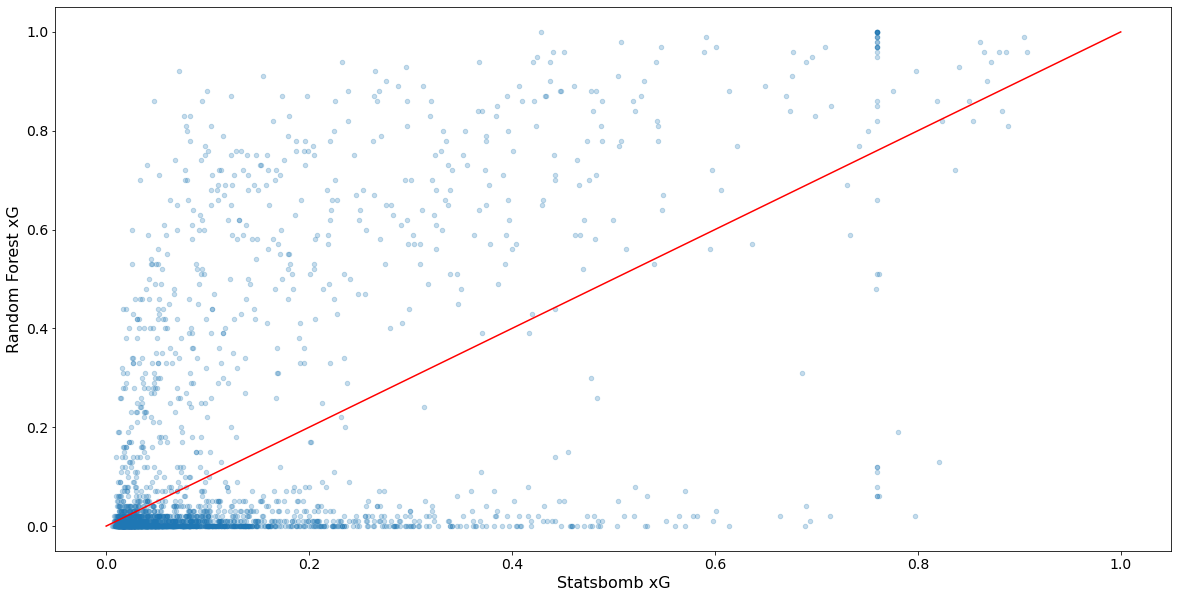

In [301]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
compare_with_statsbomb.plot("shot_statsbomb_xg", "rf_xG", kind="scatter", ax=ax, alpha=0.25)
ax.plot([0, 1], [0, 1], color='red')
ax.tick_params(labelsize=14)
ax.set_xlabel("Statsbomb xG", size=16)
ax.set_ylabel("Random Forest xG", size=16)

### Future Work and Conclusion

* We can see that Random Forest's values have quite a large spread around Statsbomb’s. However, it is important to keep in mind that the models were trained on only Barcelona’s La Liga data from 2004-2020 which is roughly 12,000 shots, whereas Statsbomb’s model was likely trained on a much larger data set. Feeding more data into our models would certainly improve performance. 

* Saying that, there are certainly other improvements that could be made outside of this. An obvious improvement could be to engineer better features. Some of these features could be **the distance from goal when the shot was taken**, **the angle with respect to the goal**. All these ideas, and many more, could improve the model, and may be implemented in the future.
